In [55]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

# Compare Shape Measurements

In this notebook, I compare the shape measurements in this project to independent shape measurements available on the Illustris data access website.  

## Choose Simulation

In [ ]:
# specify simulation
simname = 'Illustris-1'
snapNum = 135

# load simulation information
from Illustris_Shapes.simulation_props import sim_prop_dict
d = sim_prop_dict[simname]
basePath = d['basePath']
Lbox = d['Lbox']

## Load Shape Catalogs

In [59]:
# open public Illustris shape catalog
import h5py
basePath = '/Volumes/G-RAID/simulations/unprocessed/Illustris/Illustris-1'
f = h5py.File(basePath + '/stellar_circs.hdf5', 'r')
t_0 = f.get('Snapshot_'+snapNum)

# open custom shape catalogs
from astropy.table import Table
fname = simname + '_' + str(snapNum) + '_' + 'non-reduced' + '_' +'galaxy_shapes'+ '.dat' 
t_1 = Table.read('../data/shape_catalogs/'+fname, format='ascii')

fname = simname + '_' + str(snapNum) + '_' + 'reduced' + '_' +'galaxy_shapes'+ '.dat' 
t_2 = Table.read('../data/shape_catalogs/'+fname, format='ascii')

fname = simname + '_' + str(snapNum) + '_' + 'iterative' + '_' +'galaxy_shapes'+ '.dat' 
t_3 = Table.read('../data/shape_catalogs/'+fname, format='ascii')

## Compare Axis Ratios

Here I compare different measures of galaxy shapes.

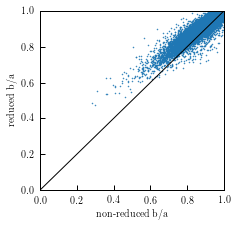

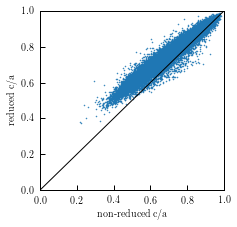

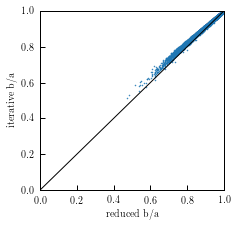

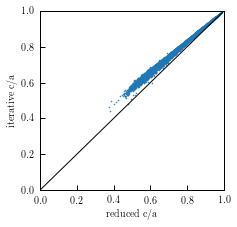

In [60]:
plt.figure(figsize=(3.3,3.3))
plt.plot(t_1['b']/t_1['a'], t_2['b']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('non-reduced b/a')
plt.ylabel('reduced b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(t_1['c']/t_1['a'], t_2['c']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('non-reduced c/a')
plt.ylabel('reduced c/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(t_2['b']/t_2['a'], t_3['b']/t_3['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('reduced b/a')
plt.ylabel('iterative b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(t_2['c']/t_2['a'], t_3['c']/t_3['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('reduced c/a')
plt.ylabel('iterative c/a')
plt.show()


Here I compare my measurements to the poublic Illustris shape catalog.

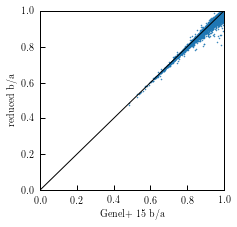

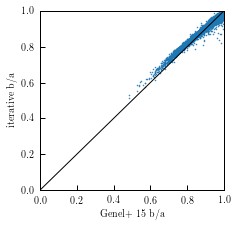

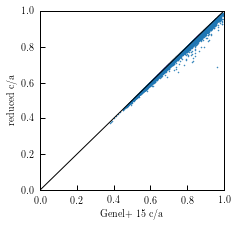

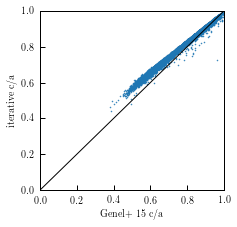

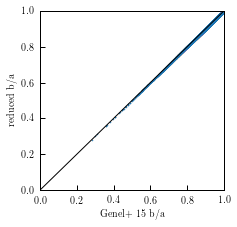

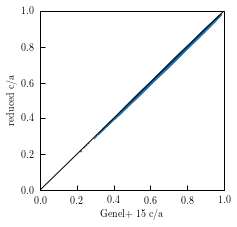

In [61]:
# compare reduced and iterative to reduced Genel table

c_0 = t_0['ReducedMassTensorEigenVals'][:,0]
b_0 = t_0['ReducedMassTensorEigenVals'][:,1]
a_0 = t_0['ReducedMassTensorEigenVals'][:,2]

plt.figure(figsize=(3.3,3.3))
plt.plot(b_0/a_0, t_2['b']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 b/a')
plt.ylabel('reduced b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(b_0/a_0, t_3['b']/t_3['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 b/a')
plt.ylabel('iterative b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(c_0/a_0, t_2['c']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 c/a')
plt.ylabel('reduced c/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(c_0/a_0, t_3['c']/t_3['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 c/a')
plt.ylabel('iterative c/a')
plt.show()

# compare non-reduced reduced Genel table
c_0 = t_0['MassTensorEigenVals'][:,0]
b_0 = t_0['MassTensorEigenVals'][:,1]
a_0 = t_0['MassTensorEigenVals'][:,2]

plt.figure(figsize=(3.3,3.3))
plt.plot(b_0/a_0, t_1['b']/t_1['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 b/a')
plt.ylabel('reduced b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(c_0/a_0, t_1['c']/t_1['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Genel+ 15 c/a')
plt.ylabel('reduced c/a')
plt.show()


## Compare Orientations

Here I compare the orientations between different methods.  Illustris does not provide orietnations in the publicallly available catalog.

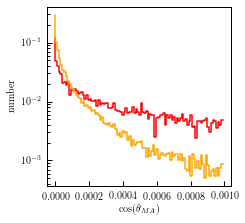

In [54]:
Av_1 = np.vstack((t_1['av_x'], t_1['av_y'], t_1['av_x'])).T
Av_2 = np.vstack((t_2['av_x'], t_2['av_y'], t_2['av_x'])).T
Av_3 = np.vstack((t_3['av_x'], t_3['av_y'], t_3['av_x'])).T

Bv_1 = np.vstack((t_1['bv_x'], t_1['bv_y'], t_1['bv_x'])).T
Bv_2 = np.vstack((t_2['bv_x'], t_2['bv_y'], t_2['bv_x'])).T
Bv_3 = np.vstack((t_3['bv_x'], t_3['bv_y'], t_3['bv_x'])).T

Cv_1 = np.vstack((t_1['cv_x'], t_1['cv_y'], t_1['cv_x'])).T
Cv_2 = np.vstack((t_2['cv_x'], t_2['cv_y'], t_2['cv_x'])).T
Cv_3 = np.vstack((t_3['cv_x'], t_3['cv_y'], t_3['cv_x'])).T

from rotations.vector_utilities import angles_between_list_of_vectors
bins = np.linspace(0,0.001,100)

theta_1 = angles_between_list_of_vectors(Av_1, Av_2)
counts_1 = np.histogram(1-np.fabs(np.cos(theta_1)), bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(counts_1)

theta_2 = angles_between_list_of_vectors(Bv_2, Bv_3)
counts_2 = np.histogram(1-np.fabs(np.cos(theta_2)), bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(counts_2)

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1], counts_1, '-', color='red')
plt.step(bins[:-1], counts_2, '-', color='orange')
plt.xlabel(r'$\cos(\theta_{MA})$')
plt.ylabel('number')
plt.yscale('log')
plt.show()